**<h1>Description<h1>**
The Excel file Credit Risk Data provides information about bank customers who had applied for loans. The data include the purpose of the loan, checking(Interest X) and savings account balances(Interest O), number of months as a customer of the bank, months employed, gender, marital status, age, housing status and number of years at current residence, job type, and credit-risk classification by the bank.(for Wk1-3)<br>

**a**. Compute the combined checking and savings account balance for each record in the database. Then sort the records by the number of months as a customer of the bank. From examining the data, does it appear that customers with a longer association with the bank have more assets? Construct a scatter chart to validate your conclusions.<br>
**b**. More to come!

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="ticks", color_codes=True)

%matplotlib inline



mpl.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_excel('Data_Sets.xlsx')

In [10]:
df1 = df

In [32]:
col_list=list(df1.columns.values)

In [33]:
col_list

['Unnamed: 0',
 'Credit Risk Data',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15']

In [28]:
col_list[13]

'Unnamed: 13'

In [34]:
df1.drop([col_list[13], col_list[14], col_list[15]], inplace=True, axis=1)

,Unnamed: 0,Credit Risk Data,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Entry Number,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
2,1,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low
3,2,Furniture,0,1230,25,0,M,Divorced,32,Own,1,Skilled,High
4,3,New Car,0,389,19,119,M,Single,38,Own,4,Management,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,421,Small Appliance,497,0,7,51,M,Single,35,Other,4,Skilled,Low
423,422,Furniture,0,0,31,53,M,Single,30,Own,4,Skilled,High
424,423,New Car,0,0,25,103,F,Divorced,28,Own,2,Skilled,High
425,424,New Car,0,712,16,6,F,Divorced,28,Own,2,Skilled,High


In [39]:
df1 = df1.shift(-1)

In [43]:
df1

,Unnamed: 0,Credit Risk Data,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Entry Number,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
1,1,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low
2,2,Furniture,0,1230,25,0,M,Divorced,32,Own,1,Skilled,High
3,3,New Car,0,389,19,119,M,Single,38,Own,4,Management,High
4,4,Furniture,638,347,13,14,M,Single,36,Own,2,Unskilled,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,422,Furniture,0,0,31,53,M,Single,30,Own,4,Skilled,High
423,423,New Car,0,0,25,103,F,Divorced,28,Own,2,Skilled,High
424,424,New Car,0,712,16,6,F,Divorced,28,Own,2,Skilled,High
425,425,New Car,0,912,7,39,M,Single,44,Own,3,Management,Low


In [45]:
new_col_names = pd.Series(df1.iloc[0])

In [46]:
new_col_names

Unnamed: 0             Entry Number
Credit Risk Data       Loan Purpose
Unnamed: 2                Checking 
Unnamed: 3                  Savings
Unnamed: 4          Months Customer
Unnamed: 5          Months Employed
Unnamed: 6                   Gender
Unnamed: 7           Marital Status
Unnamed: 8                      Age
Unnamed: 9                  Housing
Unnamed: 10                   Years
Unnamed: 11                     Job
Unnamed: 12             Credit Risk
Name: 0, dtype: object

In [48]:
df1.columns = list(new_col_names)

In [49]:
df1.columns

Index(['Entry Number', 'Loan Purpose', 'Checking ', 'Savings',
       'Months Customer', 'Months Employed', 'Gender', 'Marital Status', 'Age',
       'Housing', 'Years', 'Job', 'Credit Risk'],
      dtype='object')

In [51]:
df1

,Entry Number,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
0,Entry Number,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
1,1,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low
2,2,Furniture,0,1230,25,0,M,Divorced,32,Own,1,Skilled,High
3,3,New Car,0,389,19,119,M,Single,38,Own,4,Management,High
4,4,Furniture,638,347,13,14,M,Single,36,Own,2,Unskilled,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,422,Furniture,0,0,31,53,M,Single,30,Own,4,Skilled,High
423,423,New Car,0,0,25,103,F,Divorced,28,Own,2,Skilled,High
424,424,New Car,0,712,16,6,F,Divorced,28,Own,2,Skilled,High
425,425,New Car,0,912,7,39,M,Single,44,Own,3,Management,Low


In [55]:
df1=df1.drop(df1.index[0])

,Entry Number,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
1,1,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low
2,2,Furniture,0,1230,25,0,M,Divorced,32,Own,1,Skilled,High
3,3,New Car,0,389,19,119,M,Single,38,Own,4,Management,High
4,4,Furniture,638,347,13,14,M,Single,36,Own,2,Unskilled,High
5,5,Education,963,4754,40,45,M,Single,31,Rent,3,Skilled,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,422,Furniture,0,0,31,53,M,Single,30,Own,4,Skilled,High
423,423,New Car,0,0,25,103,F,Divorced,28,Own,2,Skilled,High
424,424,New Car,0,712,16,6,F,Divorced,28,Own,2,Skilled,High
425,425,New Car,0,912,7,39,M,Single,44,Own,3,Management,Low


In [64]:
df1=df1.drop(df1.index[425])

In [65]:
df1

,Entry Number,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
1,1,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low
2,2,Furniture,0,1230,25,0,M,Divorced,32,Own,1,Skilled,High
3,3,New Car,0,389,19,119,M,Single,38,Own,4,Management,High
4,4,Furniture,638,347,13,14,M,Single,36,Own,2,Unskilled,High
5,5,Education,963,4754,40,45,M,Single,31,Rent,3,Skilled,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,421,Small Appliance,497,0,7,51,M,Single,35,Other,4,Skilled,Low
422,422,Furniture,0,0,31,53,M,Single,30,Own,4,Skilled,High
423,423,New Car,0,0,25,103,F,Divorced,28,Own,2,Skilled,High
424,424,New Car,0,712,16,6,F,Divorced,28,Own,2,Skilled,High


In [82]:
df1.isnull()

,Entry Number,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,False,False,False,False,False,False,False,False,False,False,False,False,False
422,False,False,False,False,False,False,False,False,False,False,False,False,False
423,False,False,False,False,False,False,False,False,False,False,False,False,False
424,False,False,False,False,False,False,False,False,False,False,False,False,False


In [85]:
df1.isnull().sum()

Entry Number       0
Loan Purpose       0
Checking           0
Savings            0
Months Customer    0
Months Employed    0
Gender             0
Marital Status     0
Age                0
Housing            0
Years              0
Job                0
Credit Risk        0
dtype: int64

There's no NaN value? Thank you very much!

In [88]:
del df1['Entry Number']

In [89]:
df1

,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
1,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low
2,Furniture,0,1230,25,0,M,Divorced,32,Own,1,Skilled,High
3,New Car,0,389,19,119,M,Single,38,Own,4,Management,High
4,Furniture,638,347,13,14,M,Single,36,Own,2,Unskilled,High
5,Education,963,4754,40,45,M,Single,31,Rent,3,Skilled,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
421,Small Appliance,497,0,7,51,M,Single,35,Other,4,Skilled,Low
422,Furniture,0,0,31,53,M,Single,30,Own,4,Skilled,High
423,New Car,0,0,25,103,F,Divorced,28,Own,2,Skilled,High
424,New Car,0,712,16,6,F,Divorced,28,Own,2,Skilled,High


### We're ready to explore the Data. 

I will visualize the Data first. 

In [92]:
df1

,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
1,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low
2,Furniture,0,1230,25,0,M,Divorced,32,Own,1,Skilled,High
3,New Car,0,389,19,119,M,Single,38,Own,4,Management,High
4,Furniture,638,347,13,14,M,Single,36,Own,2,Unskilled,High
5,Education,963,4754,40,45,M,Single,31,Rent,3,Skilled,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
421,Small Appliance,497,0,7,51,M,Single,35,Other,4,Skilled,Low
422,Furniture,0,0,31,53,M,Single,30,Own,4,Skilled,High
423,New Car,0,0,25,103,F,Divorced,28,Own,2,Skilled,High
424,New Car,0,712,16,6,F,Divorced,28,Own,2,Skilled,High


I want to devide Categorical Data & Numerical Data. 

In [95]:
df1.describe()

,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
count,425,425,425,425,425,425,425,425,425,425,425,425
unique,10,168,322,30,102,2,3,50,3,4,4,2
top,Small Appliance,0,0,13,0,M,Single,22,Own,4,Skilled,Low
freq,105,251,62,76,25,290,233,21,292,169,271,214


In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 1 to 425
Data columns (total 12 columns):
Loan Purpose       425 non-null object
Checking           425 non-null object
Savings            425 non-null object
Months Customer    425 non-null object
Months Employed    425 non-null object
Gender             425 non-null object
Marital Status     425 non-null object
Age                425 non-null object
Housing            425 non-null object
Years              425 non-null object
Job                425 non-null object
Credit Risk        425 non-null object
dtypes: object(12)
memory usage: 43.2+ KB


All type is defined as object type. I have to divide all columns manually. 

In [109]:
df1.head(1)

,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
1,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low


In [137]:
cate_list = ['Loan Purpose','Gender', 'Marital Status', 'Housing', 'Job', 'Credit Risk']
num_list = ['Checking ', 'Savings', 'Months Customer','Months Employed',
           'Age', 'Years' ]

In [143]:
df1.columns.values

array(['Loan Purpose', 'Checking ', 'Savings', 'Months Customer',
       'Months Employed', 'Gender', 'Marital Status', 'Age', 'Housing',
       'Years', 'Job', 'Credit Risk'], dtype=object)

In [148]:
cate_df = df1[cate_list]
print(cate_df.head(3))

      Loan Purpose Gender Marital Status Housing         Job Credit Risk
1  Small Appliance      M         Single     Own   Unskilled         Low
2        Furniture      M       Divorced     Own     Skilled        High
3          New Car      M         Single     Own  Management        High


In [150]:
num_df = df1[num_list]
print(num_df.head(3))

  Checking  Savings Months Customer Months Employed Age Years
1         0     739              13              12  23     3
2         0    1230              25               0  32     1
3         0     389              19             119  38     4


In [168]:
num_df = num_df.infer_objects()

#make type to int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c5099b0>,
      dtype=object)

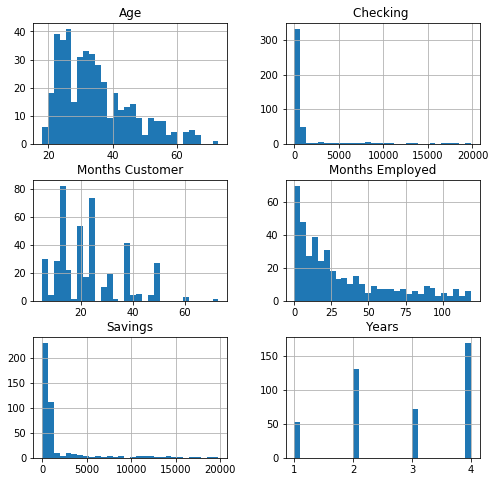

In [176]:
num_df.hist(bins=30, figsize=(8, 8))

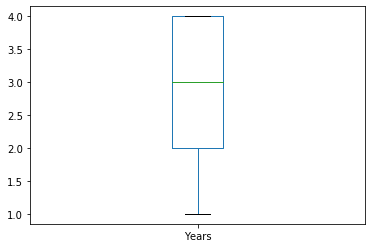

In [187]:
num_df['Years'].plot.box( sym='r+')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a350d5470>,
      dtype=object)

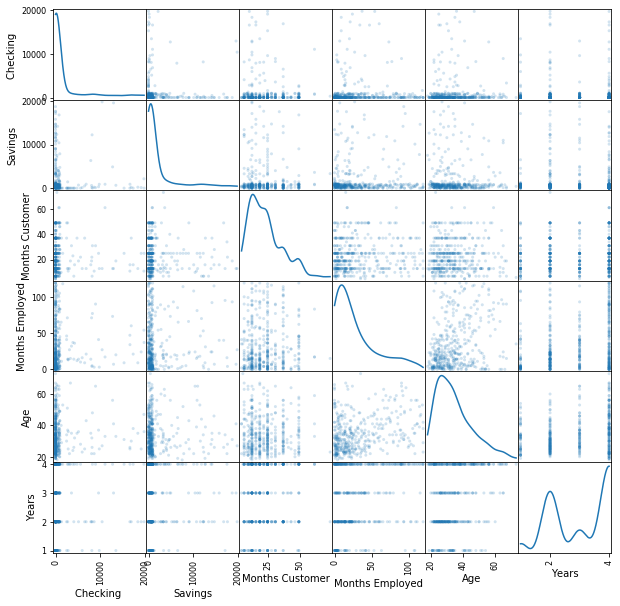

In [196]:
scatter_matrix(num_df, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [197]:
cate_df

,Loan Purpose,Gender,Marital Status,Housing,Job,Credit Risk
1,Small Appliance,M,Single,Own,Unskilled,Low
2,Furniture,M,Divorced,Own,Skilled,High
3,New Car,M,Single,Own,Management,High
4,Furniture,M,Single,Own,Unskilled,High
5,Education,M,Single,Rent,Skilled,Low
...,...,...,...,...,...,...
421,Small Appliance,M,Single,Other,Skilled,Low
422,Furniture,M,Single,Own,Skilled,High
423,New Car,F,Divorced,Own,Skilled,High
424,New Car,F,Divorced,Own,Skilled,High


In [207]:
cate_df = cate_df.astype('category')

In [208]:
cate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 1 to 425
Data columns (total 6 columns):
Loan Purpose      425 non-null category
Gender            425 non-null category
Marital Status    425 non-null category
Housing           425 non-null category
Job               425 non-null category
Credit Risk       425 non-null category
dtypes: category(6)
memory usage: 6.8 KB


In [213]:
frames = [cate_df, num_df]

In [219]:
df2 = pd.concat(frames, axis=1, sort=False)

In [220]:
df2

,Loan Purpose,Gender,Marital Status,Housing,Job,Credit Risk,Checking,Savings,Months Customer,Months Employed,Age,Years
1,Small Appliance,M,Single,Own,Unskilled,Low,0,739,13,12,23,3
2,Furniture,M,Divorced,Own,Skilled,High,0,1230,25,0,32,1
3,New Car,M,Single,Own,Management,High,0,389,19,119,38,4
4,Furniture,M,Single,Own,Unskilled,High,638,347,13,14,36,2
5,Education,M,Single,Rent,Skilled,Low,963,4754,40,45,31,3
...,...,...,...,...,...,...,...,...,...,...,...,...
421,Small Appliance,M,Single,Other,Skilled,Low,497,0,7,51,35,4
422,Furniture,M,Single,Own,Skilled,High,0,0,31,53,30,4
423,New Car,F,Divorced,Own,Skilled,High,0,0,25,103,28,2
424,New Car,F,Divorced,Own,Skilled,High,0,712,16,6,28,2


In [230]:
df2['saving_total'] = df2['Checking ']+df2['Savings']

In [231]:
df2.dtypes

Loan Purpose       category
Gender             category
Marital Status     category
Housing            category
Job                category
Credit Risk        category
Checking              int64
Savings               int64
Months Customer       int64
Months Employed       int64
Age                   int64
Years                 int64
saving_total          int64
dtype: object

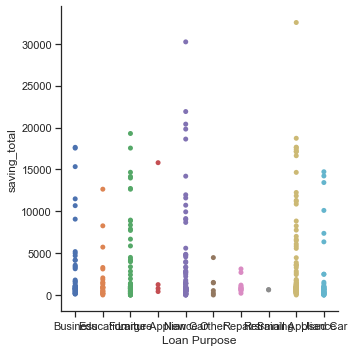

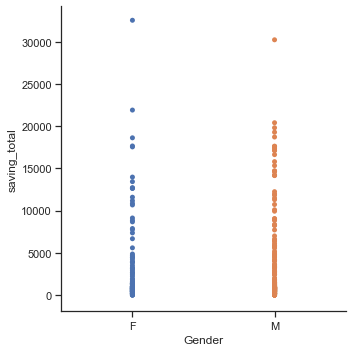

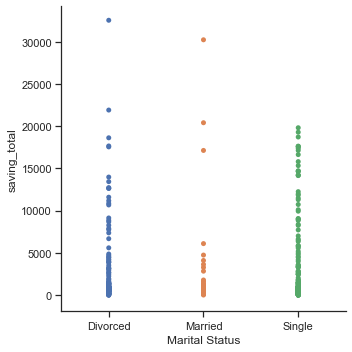

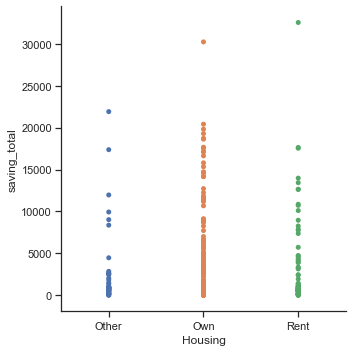

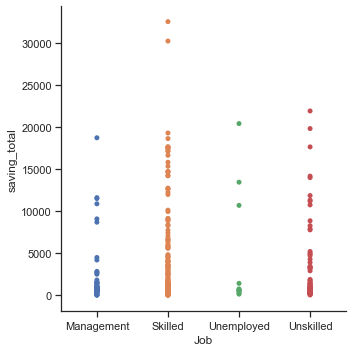

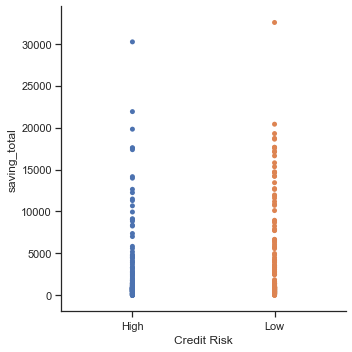

In [236]:
for i in cate_list:
    sns.catplot(x=i, y="saving_total", jitter=False, data=df2);

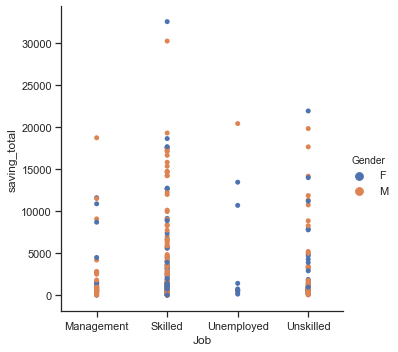

In [239]:
sns.catplot(x="Job", y="saving_total", hue='Gender',jitter=False, data=df2);

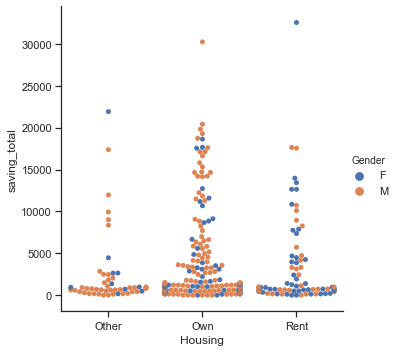

In [244]:
sns.catplot(x="Housing", y="saving_total", hue='Gender',
            kind='swarm', data=df2);


Q1: a. Compute the combined checking and savings account balance for each record in the database. Then sort the records by the number of months as a customer of the bank. From examining the data, does it appear that customers with a longer association with the bank have more assets? Construct a scatter chart to validate your conclusions.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


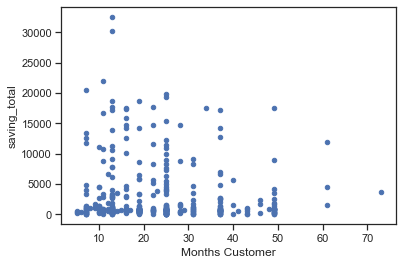

In [245]:
df2.plot.scatter(x='Months Customer', y='saving_total')